In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model


In [4]:
data = pd.read_csv('../data/CCPP/ccpp.csv')
data.head(), data.tail(), data.shape

(      AT      V       AP     RH      PE
 0   8.34  40.77  1010.84  90.01  480.48
 1  23.64  58.49  1011.40  74.20  445.75
 2  29.74  56.90  1007.15  41.91  438.76
 3  19.07  49.69  1007.22  76.79  453.09
 4  11.80  40.66  1017.13  97.20  464.43,
          AT      V       AP     RH      PE
 9563  15.12  48.92  1011.80  72.93  462.59
 9564  33.41  77.95  1010.30  59.72  432.90
 9565  15.99  43.34  1014.20  78.66  465.96
 9566  17.65  59.87  1018.58  94.65  450.93
 9567  23.68  51.30  1011.86  71.24  451.67,
 (9568, 5))

In [3]:
y = data[['PE']]
y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


In [5]:
X = data[['AT', 'V', 'AP', 'RH']]
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [7]:
from sklearn.model_selection import train_test_split
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7176, 4)
(7176, 1)
(2392, 4)
(2392, 1)


In [9]:
from sklearn.linear_model import LinearRegression
# 拟合，scikit-learn的线性回归算法使用的是最小二乘法
linreg = LinearRegression()  # 建立模型
linreg.fit(X_train, y_train)  # 拟合模型

LinearRegression()

In [10]:
# 拟合完毕后，我们看看我们的需要的模型系数结果
print(linreg.intercept_)
print(linreg.coef_)

[447.06297099]
[[-1.97376045 -0.23229086  0.0693515  -0.15806957]]


In [11]:
# 使用均方差MSE、均方根差RMSE，在测试集上评估模型

#模型拟合测试集
y_pred = linreg.predict(X_test)

from sklearn import metrics
# 用scikit-learn计算MSE
print("MSE:",metrics.mean_squared_error(y_test, y_pred))
# 用scikit-learn计算RMSE
print("MSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


MSE: 20.08040120207389
MSE: 4.481116066570235


In [12]:
# 如果我们用其他方法得到了不同的系数，需要选择模型时，就用MSE小的时候对应的参数
# 比如这次我们用AT， V，AP这3个列作为样本特征，不要RH。输出仍然是PE。代码如下
X = data[['AT', 'V', 'AP']]
y = data[['PE']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
#模型拟合测试集
y_pred = linreg.predict(X_test)
from sklearn import metrics
# 用scikit-learn计算MSE
print("MSE:",metrics.mean_squared_error(y_test, y_pred))
# 用scikit-learn计算RMSE
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE: 23.208907470136225
RMSE: 4.817562399194869


In [13]:
# 交叉验证 用于优化模型
# 这里使用9折交叉验证
X = data[['AT', 'V', 'AP', 'RH']]
y = data[['PE']]
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(linreg, X, y, cv=9)  # 线性模型 9折交叉验证
# 用scikit-learn计算MSE
print("MSE:",metrics.mean_squared_error(y, predicted))
# 用scikit-learn计算RMSE
print("RMSE:",np.sqrt(metrics.mean_squared_error(y, predicted)))


MSE: 20.79279378875543
RMSE: 4.559911598787353


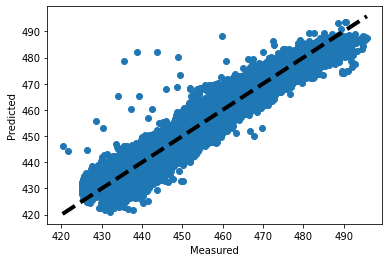

In [14]:
# 使用plt画图，返回值是
fig, ax = plt.subplots()
# 横纵坐标
ax.scatter(y, predicted)
# 绘制，（横坐标范围，纵坐标范围，格式化字符串 k--是黑色虚线，lw是线的粗度）
# plot的用法具体见 https://blog.csdn.net/leaf_zizi/article/details/87094168
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
# 横纵坐标名
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
# 显示
plt.show()